In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def thinning(image, kernel):
    skel = np.zeros_like(image)

    while cv2.countNonZero(image) > 0:
        eroded = cv2.erode(image, kernel)
        temp = cv2.dilate(eroded, kernel)
        temp = cv2.subtract(image, temp)
        skel = cv2.bitwise_or(skel, temp)
        image = eroded.copy()

    return skel

In [12]:
def skeletonize(image, kernel):
    size = np.size(image)
    skel = np.zeros(image.shape, np.uint8)

    ret, image = cv2.threshold(image, 127, 255, 0)

    done = False
    while not done:
        skel = cv2.bitwise_or(skel, thinning(image, kernel))
        eroded = cv2.erode(image, np.ones((3, 3), dtype=np.uint8))
        temp = cv2.dilate(eroded, np.ones((3, 3), dtype=np.uint8))
        temp = cv2.subtract(image, temp)
        image = eroded.copy()

        zeros = size - cv2.countNonZero(image)
        if zeros == size:
            done = True

    return skel

In [13]:
image = cv2.imread("image1.png", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
skel = skeletonize(image, kernel)

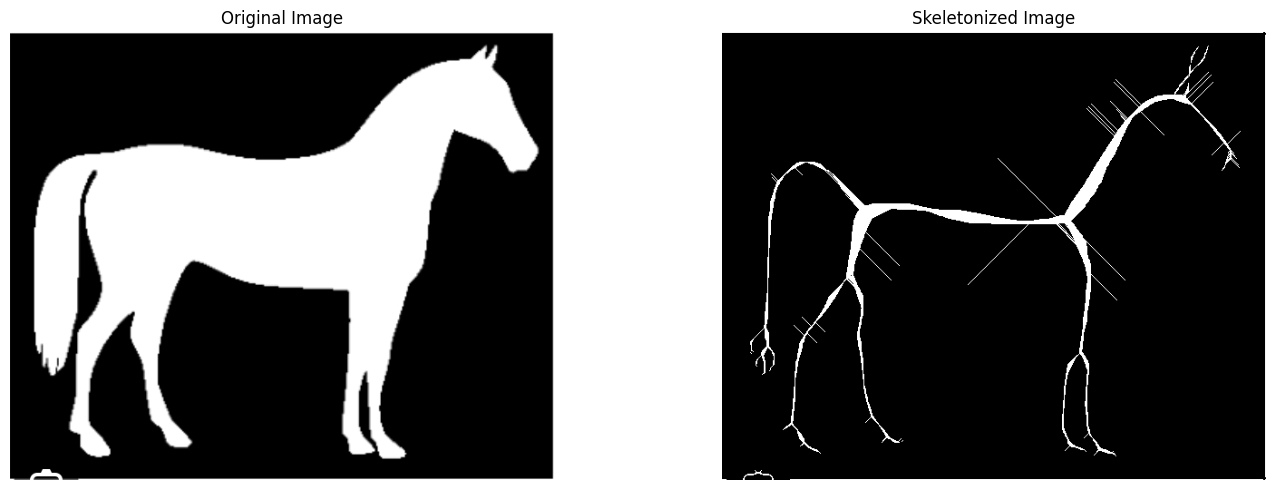

In [14]:
fig, axes = plt.subplots(1,  2, figsize=(15,  5))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(skel, cmap=plt.cm.gray)
axes[1].set_title('Skeletonized Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [15]:
image = cv2.imread("image2.png", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]], dtype=np.uint8)
skel = skeletonize(image, kernel)

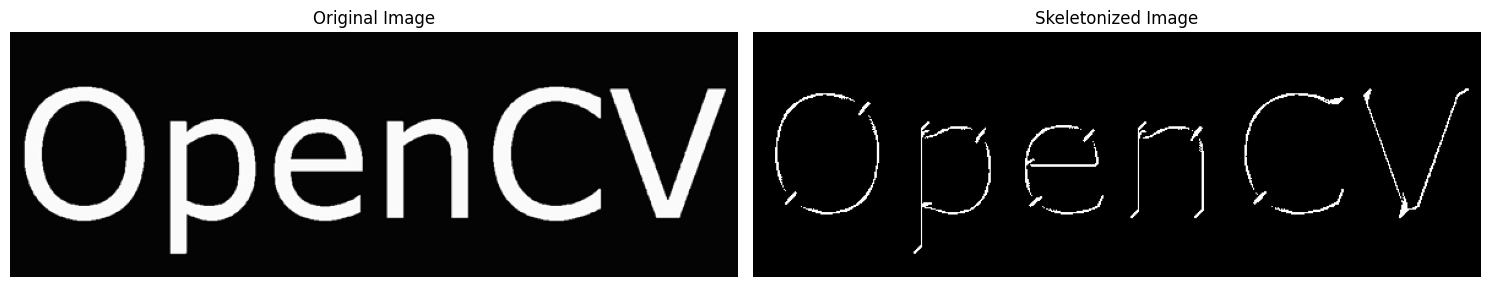

In [16]:
fig, axes = plt.subplots(1,  2, figsize=(15,  5))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(skel, cmap=plt.cm.gray)
axes[1].set_title('Skeletonized Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [17]:
image = cv2.imread("image3.png", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
skel = skeletonize(image, kernel)

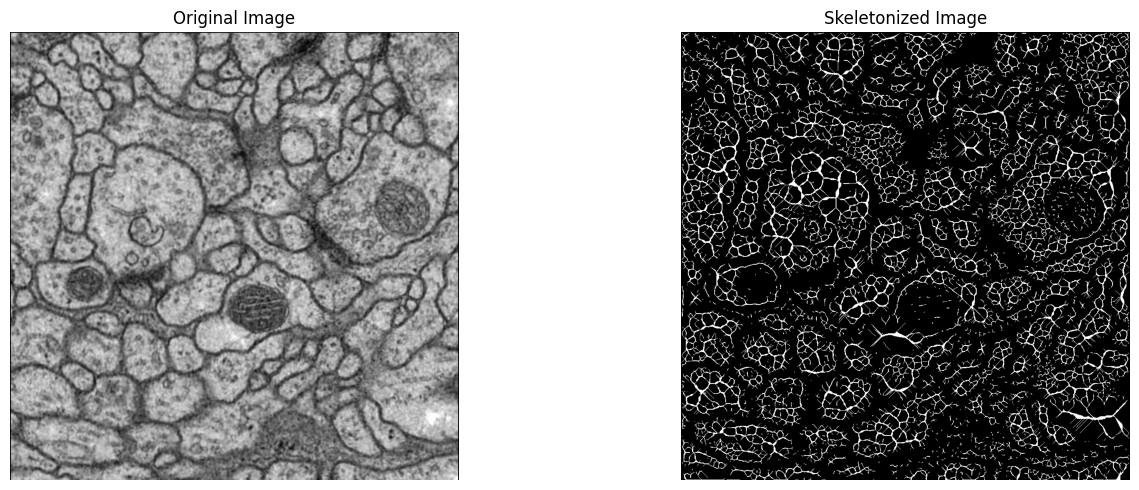

In [18]:
fig, axes = plt.subplots(1,  2, figsize=(15,  5))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(skel, cmap=plt.cm.gray)
axes[1].set_title('Skeletonized Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()